In [8]:
from utils import *
from IPython.display import display, SVG
from keras.utils.vis_utils import model_to_dot

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
DEBUG = False

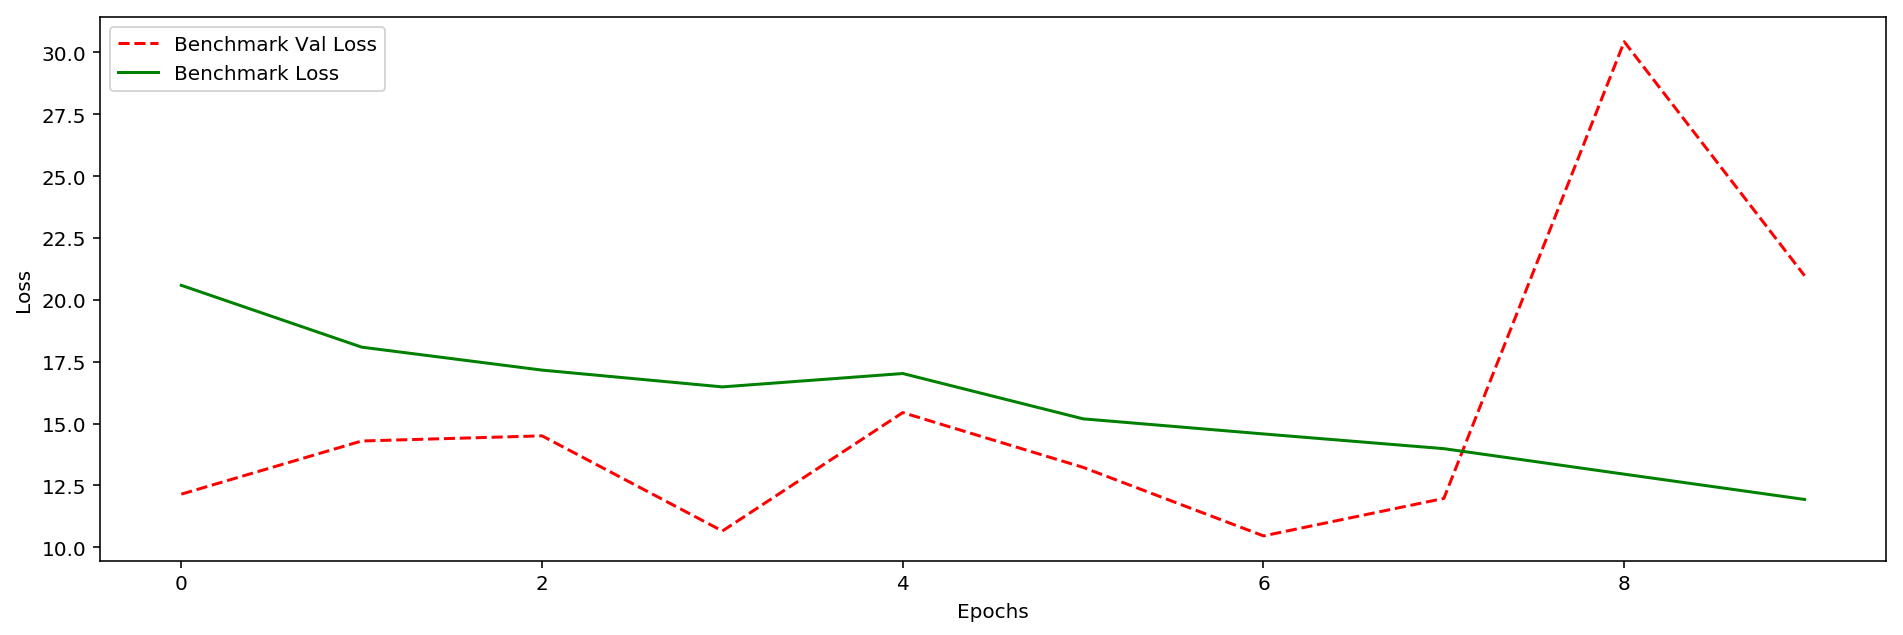

In [20]:
import pickle

hist, time = pickle.load(open('model_v0_train.info', 'rb'))
epochs = len(hist['loss'])
plt.figure(figsize=(16, 5))
plt.plot(range(epochs),
         hist['val_mean_squared_error'],
         'r--',
         label='Benchmark Val Loss')
plt.plot(range(epochs),
         hist['mean_squared_error'],
         'g-',
         label='Benchmark Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.figure(figsize=(16, 5))
# plt.plot(range(test_labels.shape[0]),
#          test_labels,
#          'g-',
#          label='real')
# plt.plot(range(test_labels.shape[0]),
#          test_v0_out,
#          'r-',
#          label='benchmark')
# plt.xlim(-10, test_labels.shape[0] + 10)
# plt.show()

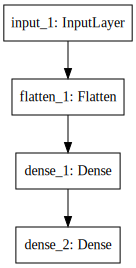

In [11]:
from keras.models import model_from_json
from keras.utils import plot_model
model = model_from_json(open('models/model.json', 'r').read())
model.load_weights('models/model.h5')
#plot_model(model, to_file='model.eps')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 39600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               20275712  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 20,276,225
Trainable params: 20,276,225
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
(200 * 66 * 3 + 1) * 512

20275712